# Importing Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%run "./../1.Load Codes/1.1 Variables.ipynb"

Loaded variables


# Loading data from previous modules

In [3]:
import pickle

files_data = pickle.load(open(home_path + '/1.Load Codes/files.pickle',"rb"))
acorn_data = files_data['acorn_data']
energy_data = files_data['energy_data']
households_data = files_data['households_data']
weather_data = files_data['weather_data']

# Energy Consumption Plot

In [4]:
# We are grouping the energy consumption by the average consumption everyday.

energy_data['datestamp'] = pd.to_datetime(energy_data.day,format='%Y-%m-%d').dt.date
energy_data_day = energy_data.groupby('datestamp').agg({'energy_sum': 'mean'}).reset_index()
energy_data_day['datestamp'] = pd.to_datetime(energy_data_day['datestamp']).dt.date

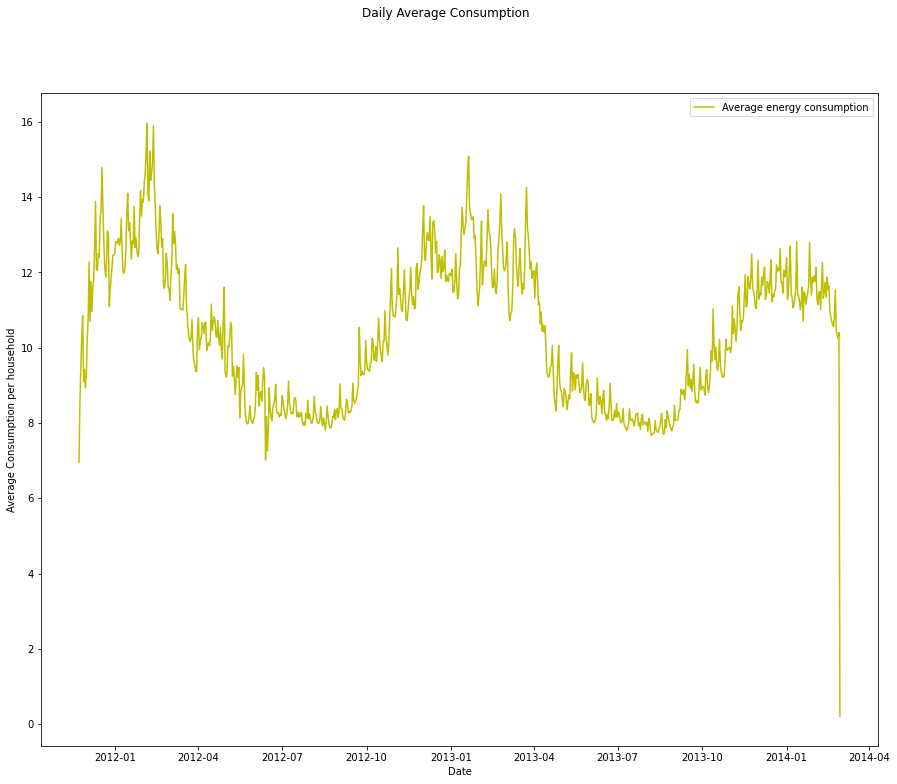

In [5]:
#Generating the energy consumption plot per day

f = plt.figure("Daily Average Consumption", figsize=(15, 12))
f.suptitle("Daily Average Consumption")

a = plt.axes()
a.set_xlabel('Date') 
a.set_ylabel('Average Consumption per household') 

a.plot(energy_data_day['datestamp'], energy_data_day['energy_sum'], '-y', label='Average energy consumption');
a.legend()
plt.show()

Observations:
1. The general trend is that the energy consumption is higher between the months of Januray to April while it gradually decreases till October.
2. The daily average consumption is erratic and the graph is difficult to understand.
3. Due to point 2 above, we aim to smoothen the graph by using different rolling averages instead of the daily average of energy consumption.

# Moving average Energy consumption

In [6]:
energy_data_day[ '3day_rolling_avg' ] = energy_data_day['energy_sum'].rolling( 3).mean()
energy_data_day[ '7day_rolling_avg' ] = energy_data_day['energy_sum'].rolling( 7).mean()
energy_data_day[ '15day_rolling_avg' ] = energy_data_day['energy_sum'].rolling( 15).mean()

# viewing the dataset
energy_data_day.head(10)

,datestamp,energy_sum,3day_rolling_avg,7day_rolling_avg,15day_rolling_avg
0,2011-11-23,6.952692,NaN,NaN,NaN
1,2011-11-24,8.536480,NaN,NaN,NaN
2,2011-11-25,9.499781,8.329651,NaN,NaN
3,2011-11-26,10.267707,9.434656,NaN,NaN
4,2011-11-27,10.850805,10.206098,NaN,NaN
5,2011-11-28,9.103382,10.073965,NaN,NaN
6,2011-11-29,9.424468,9.792885,9.233616,NaN
7,2011-11-30,8.931027,9.152959,9.516236,NaN
8,2011-12-01,9.329110,9.228201,9.629469,NaN
9,2011-12-02,10.248394,9.502844,9.736413,NaN


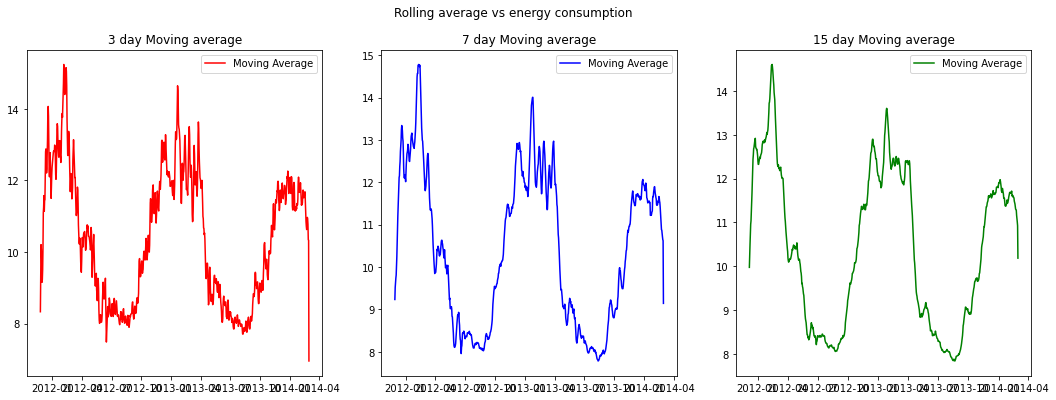

In [7]:
#Plotting graph for moving average vs energy consumption on periods of 3, 7 and 15 days

f, a = plt.subplots(1, 3, figsize=(18, 6), num = "Rolling average vs energy consumption")
f.suptitle("Rolling average vs energy consumption")
avg_periods = [3, 7, 15]
colors = ['r', 'b', 'g']

for i in range(3):
    col = str(avg_periods[i]) + 'day_rolling_avg'
    a[i].plot(energy_data_day['datestamp'], energy_data_day[col], '-' + colors[i],label='Moving Average');
    a[i].set_title(str(avg_periods[i]) + ' day Moving average')
    a[i].legend()

plt.show()

# Visualizing the Factors affecting consumption

1. Type of Energy (Std/ ToU)

In [8]:
# Tou or Std plot - per Acorn
energy_households = pd.merge(energy_data, households_data, on = 'LCLid')
energy_households_acorn = energy_households.groupby(['Acorn', 'stdorToU']).agg({'energy_sum': 'mean'}).reset_index()

energy_households_acorn_std = energy_households_acorn.loc[energy_households_acorn['stdorToU'] == 'Std']
energy_households_acorn_tou = energy_households_acorn.loc[energy_households_acorn['stdorToU'] == 'ToU']
energy_households_acorn_std.head()

,Acorn,stdorToU,energy_sum
0,ACORN-A,Std,20.097767
2,ACORN-B,Std,11.313461
4,ACORN-C,Std,12.425987
6,ACORN-D,Std,13.900830
8,ACORN-E,Std,10.687825


In [9]:
# Tou or Std plot - per Acorn group
energy_households_acorn_grp = energy_households.groupby(['Acorn_grouped', 'stdorToU']).agg({'energy_sum': 'mean'}).reset_index()

energy_households_acorn_grp_std = energy_households_acorn_grp.loc[energy_households_acorn_grp['stdorToU'] == 'Std']
energy_households_acorn_grp_tou = energy_households_acorn_grp.loc[energy_households_acorn_grp['stdorToU'] == 'ToU']
energy_households_acorn_grp_std.head()

,Acorn_grouped,stdorToU,energy_sum
0,ACORN-U,Std,12.477433
2,Adversity,Std,8.617370
4,Affluent,Std,11.825327
6,Comfortable,Std,10.261093


<ipython-input-10-255e8330e30e>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  a[0].set_xticklabels([chr(i) for i in range(ord('A'),ord('Z'))])


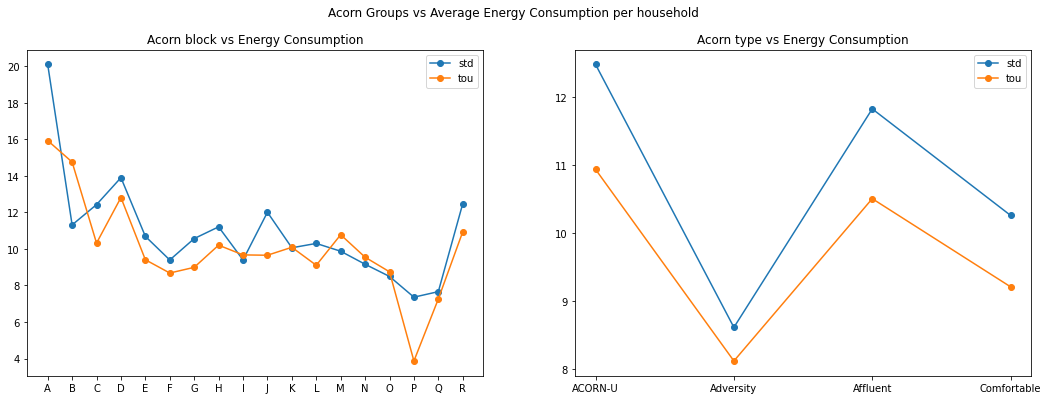

In [10]:
f, a = plt.subplots(1, 2, figsize=(18, 6), num = "Acorn Groups vs Average Energy Consumption per household")
f.suptitle("Acorn Groups vs Average Energy Consumption per household")

#Plot for Acorn Block vs Energy
a[0].plot(energy_households_acorn_std['Acorn'], energy_households_acorn_std['energy_sum'], '-o', label="std");
a[0].plot(energy_households_acorn_tou['Acorn'], energy_households_acorn_tou['energy_sum'], '-o', label="tou");
a[0].set_xticklabels([chr(i) for i in range(ord('A'),ord('Z'))])
a[0].set_title('Acorn block vs Energy Consumption')
a[0].legend()

#Plot for Acorn Group vs Energy
a[1].plot(energy_households_acorn_grp_std['Acorn_grouped'], energy_households_acorn_grp_std['energy_sum'], '-o', label="std");
a[1].plot(energy_households_acorn_grp_tou['Acorn_grouped'], energy_households_acorn_grp_tou['energy_sum'], '-o', label="tou");
a[1].set_title('Acorn type vs Energy Consumption')
a[1].legend()  

plt.show()

Observations:
 Std energy type use is generally higher than ToU across different acorn groups

2. Weather conditions

a. Weather type

In [11]:
# Aggregating the weather data by type

weather_data_icon = weather_data[['day','icon']]
weather_data_icon = weather_data_icon.dropna()
weather_data_icon = weather_data_icon.groupby('icon').agg({'day': ['count']}).reset_index()

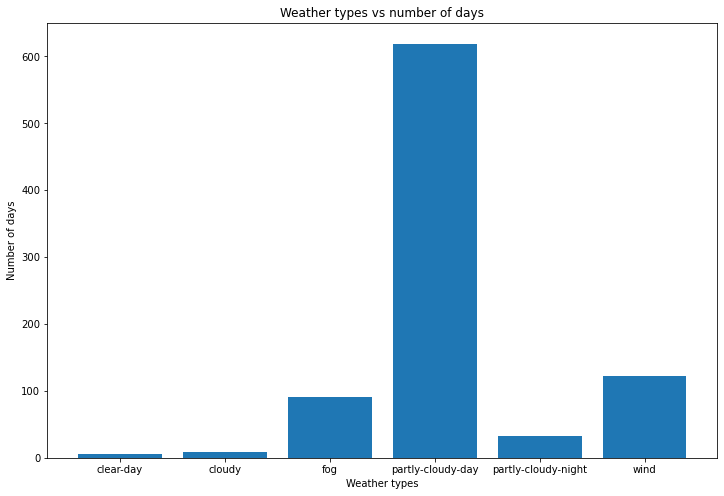

In [12]:
# Plotting weather type vs number of days

f = plt.figure("Weather types vs number of days", figsize=(12, 8))
a = plt.axes()

a.bar(weather_data_icon['icon'], weather_data_icon['day']['count']);
plt.title("Weather types vs number of days")
plt.xlabel('Weather types') 
plt.ylabel('Number of days')

plt.show()

b. Weather factors

In [13]:
weather_data['datestamp'] = pd.to_datetime(weather_data.day,format='%Y-%m-%d').dt.date

In [14]:
weather_data.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,day,datestamp
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52,2011-11-11,2011-11-11
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53,2011-12-11,2011-12-11
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10,2011-12-27,2011-12-27
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25,2011-12-02,2011-12-02
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,...,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99,2011-12-24,2011-12-24


In [15]:
weather_features = weather_data.drop(['day', 'apparentTemperatureMax','apparentTemperatureMin', 'uvIndexTime', 'summary'], axis = 1)

In [16]:
weather_features = pd.merge(energy_data_day, weather_features, on = 'datestamp')
weather_features.head()

,datestamp,energy_sum,3day_rolling_avg,7day_rolling_avg,15day_rolling_avg,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,...,sunsetTime,temperatureLow,temperatureMin,temperatureHigh,sunriseTime,temperatureHighTime,temperatureLowTime,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,2011-11-23,6.952692,NaN,NaN,NaN,10.36,2011-11-23 14:00:00,229,fog,6.29,...,2011-11-23 16:03:50,8.24,3.81,10.36,2011-11-23 07:32:38,2011-11-23 14:00:00,2011-11-23 22:00:00,2011-11-23 14:00:00,2011-11-23 22:00:00,0.94
1,2011-11-24,8.536480,NaN,NaN,NaN,12.93,2011-11-24 12:00:00,204,partly-cloudy-night,8.56,...,2011-11-24 16:02:48,9.71,8.56,12.93,2011-11-24 07:34:14,2011-11-24 12:00:00,2011-11-24 19:00:00,2011-11-24 12:00:00,2011-11-24 19:00:00,0.97
2,2011-11-25,9.499781,8.329651,NaN,NaN,13.03,2011-11-25 05:00:00,243,partly-cloudy-day,7.24,...,2011-11-25 16:01:49,7.01,7.46,12.27,2011-11-25 07:35:49,2011-11-25 12:00:00,2011-11-26 01:00:00,2011-11-25 05:00:00,2011-11-26 05:00:00,0.01
3,2011-11-26,10.267707,9.434656,NaN,NaN,12.96,2011-11-26 14:00:00,237,wind,6.96,...,2011-11-26 16:00:53,11.59,7.01,12.96,2011-11-26 07:37:22,2011-11-26 14:00:00,2011-11-26 23:00:00,2011-11-26 14:00:00,2011-11-26 23:00:00,0.05
4,2011-11-27,10.850805,10.206098,NaN,NaN,13.54,2011-11-27 10:00:00,256,wind,5.76,...,2011-11-27 16:00:00,1.31,4.47,13.54,2011-11-27 07:38:54,2011-11-27 10:00:00,2011-11-28 05:00:00,2011-11-27 10:00:00,2011-11-28 05:00:00,0.08


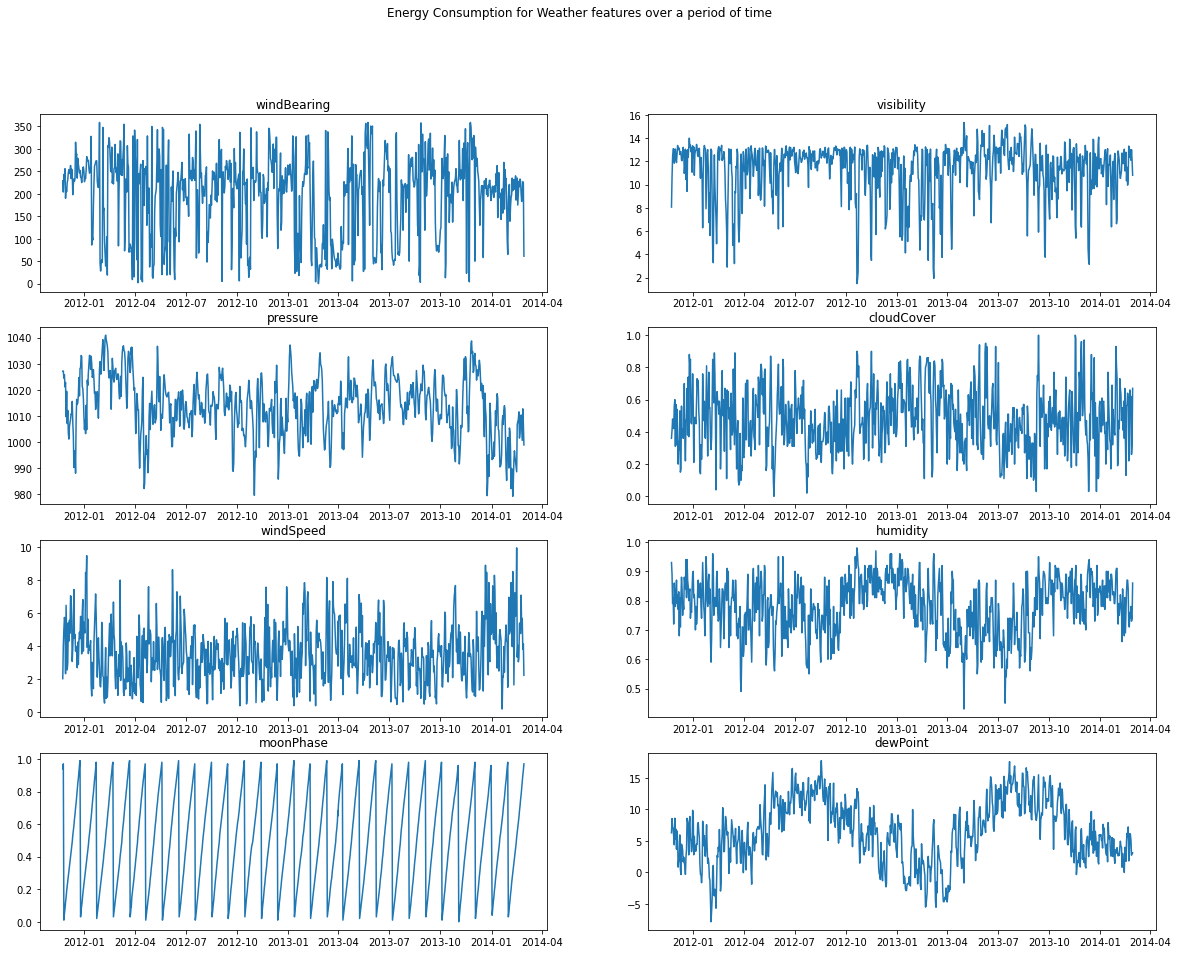

In [17]:
# Generating the energy consumption plot vs weather features

f, a = plt.subplots(4,2,figsize = (20,15))
f.suptitle("Energy Consumption for Weather features over a period of time")
ax = a.flatten()

cols = ['windBearing', 'visibility', 'pressure', 'cloudCover', 'windSpeed', 'humidity', 'moonPhase', 'dewPoint']

for i in range(len(cols)):
    ax[i].plot(weather_features['datestamp'], weather_features[cols[i]], '-');
    ax[i].set_title(cols[i])

plt.show()

Observation:

    1. The plot for Moonphase shows result in binary, which is either 1 or 0. 
    It is difficult to predict energy consumption with binary values, which makes this weather feature not useful.
    
    2. The plot for visibilty changes daily from higher values in morning to lower values in the evening.
    Therefore to predict energy consumption using this plot we will need to check for energy consumption during
    different times of the day.
    
    3. The plot for Humidity shows variation in energy values which seasonal as well as daily and having high positive     correlation with humidity making it an important feature to predict energy consumption.
    
    4.The plot for presuure shows variation in values on different levels throughout the year. 
    Which also, makes it an important feature to predict energy consumption.

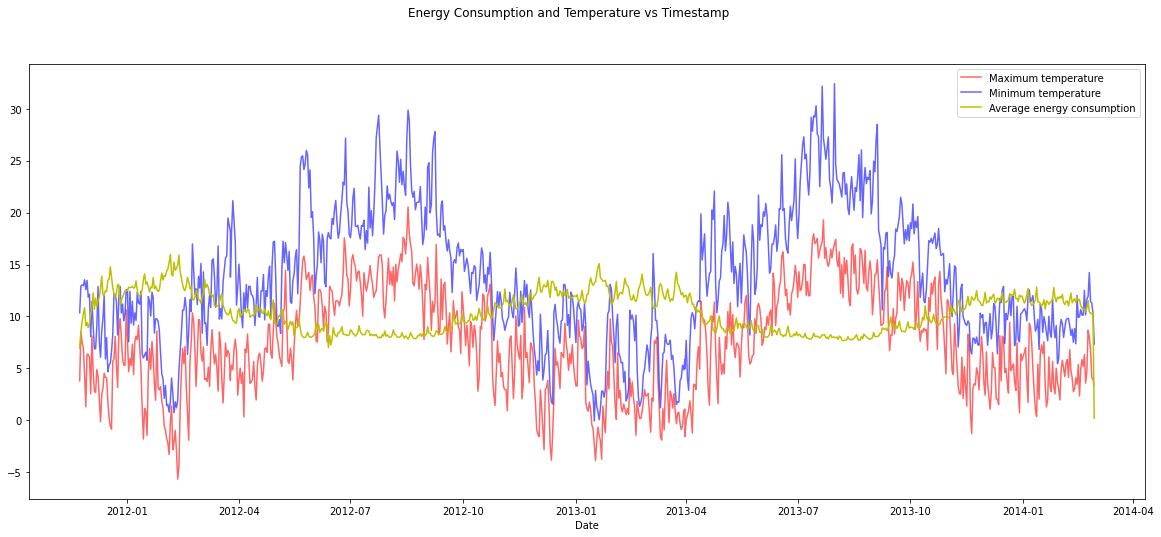

In [18]:
# Generating the energy consumption plot vs temperature

f = plt.figure("Energy Consumption and Temperature Comparison", figsize=(20, 8))
f.suptitle("Energy Consumption and Temperature vs Timestamp")

a = plt.axes()
a.set_xlabel('Date')  

a.plot(weather_features['datestamp'], weather_features['temperatureMin'], '-r', label='Maximum temperature',alpha = 0.60);
a.plot(weather_features['datestamp'], weather_features['temperatureMax'], '-b', label='Minimum temperature',alpha = 0.60);
a.plot(weather_features['datestamp'], weather_features['energy_sum'], '-y', label='Average energy consumption');

a.legend()
plt.show()

Observations :
    
    1. It can be seen that there is an inverse relationship between energy consumption and temeparture. 
    With the peaks in one that appears to go high so there is a dip in the value of the other.
    
    2. That means that during low temperature it is most likely that there will be increase in energy consumption         through heaters etc.
    